# Clip real-world raster data with vector data

In [2]:
import geopandas as gpd
from shapely.geometry import box

In [3]:
import rasterio
from rasterio.mask import mask

#### Defining a bounding box

In [4]:
bbox = box(-10.0, 34.0, 40.0, 72.0)
gdf = gpd.GeoDataFrame({'geometry' : bbox}, index = [0], crs = 'EPSG:4326')
gdf

,geometry
0,"POLYGON ((40 34, 40 72, -10 72, -10 34, 40 34))"


In [7]:
import matplotlib.pyplot as plt

<Axes: >

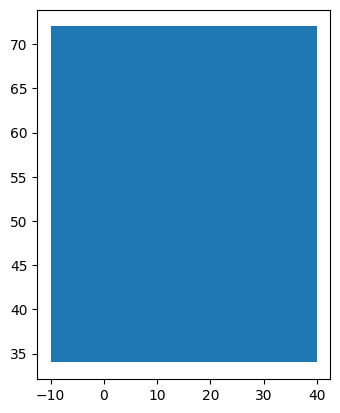

In [8]:
gdf.plot()

In [9]:
gdf.to_file('bbox.geojson', driver = 'GeoJSON')

#### Clip the raster

In [14]:
raster_file = r'C:\Users\saral\OneDrive\SL_Github\GIS_Python\Natural World tiff file\GHS_POP_E2020_GLOBE_R2023A_4326_30ss_V1_0(1)\GHS_POP_E2020_GLOBE_R2023A_4326_30ss_V1_0.tif'

In [15]:
with rasterio.open(raster_file) as src:
    print(src.crs)
    print(src.bounds)

EPSG:4326
BoundingBox(left=-180.00791593130032, bottom=-89.10041610517223, right=180.008749309419, top=89.0995831776456)


In [16]:
with rasterio.open(raster_file) as src:

    out_image, out_transform = mask(src, gdf.geometry, crop = True)

    out_meta = src.meta.copy()
    out_meta.update({
        'driver' : 'GTiff',
        'height' : out_image.shape[1],
        'width'  : out_image.shape[2],
        'transform' : out_transform
    })

In [17]:
out_meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 6001,
 'height': 4561,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.00833333330032682, 0.0, -10.00791660463318,
        0.0, -0.008333333299795073, 72.0079165797659)}

#### Save the clipped raster file

In [18]:
output_file = 'clipped_raster.tif'

In [19]:
with rasterio.open(output_file, 'w', **out_meta) as dest:
    dest.write(out_image)
    